In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 =  pd.read_excel(r"C:\Users\Edwin\Desktop\Repos\OT2Protocols\ot2protocol\Ouzo_OT2_Sampling\Run 0917\09_17_20_E_P_Scan_1.xlsx", sheet_name = 'Sheet1' ).T
df2 =  pd.read_excel(r"C:\Users\Edwin\Desktop\Repos\OT2Protocols\ot2protocol\Ouzo_OT2_Sampling\Run 0917\09_17_20_E_P_Scan_2.xlsx", sheet_name = 'Sheet1' ).T

In [3]:
# first lets convert the the typical convention of OT2 which is creating column to column
# since the plate reader was originalyl set to read row to row 

In [4]:
def plot_wavelengths(dataframe, wavelength_range = None): # dataframe to be well = row
    wavelengths = np.asarray(dataframe.iloc[0])
    
    if wavelength_range is not None:
        lower_index = np.where(wavelengths == wavelength_range[0])[0][0]
        upper_index = np.where(wavelengths == wavelength_range[1])[0][0]
        dataframe = dataframe 

        fig, ax = plt.subplots()
        for key, row in dataframe.iterrows():
            if key == 'Wavelength':
                x = row[lower_index:upper_index]
            else: 
                y = row[lower_index:upper_index]
                ax.plot(x,y)
    
    else:
        fig, ax = plt.subplots()
        for key, row in dataframe.iterrows():
            if key == 'Wavelength':
                x = row
            else: 
                y = row
                ax.plot(x,y)

In [17]:
# splitting up into dfs so can rearrange in column order
def r_to_c_order(df):    
    key = df.iloc[0]
    A = df.iloc[1:9]
    B = df.iloc[9:17]
    C = df.iloc[17:25]
    D = df.iloc[25:33]
    E = df.iloc[33:41]
    F = df.iloc[41:49]

    concat = [key]
    for i in range(8):
    #     print(A.iloc[i])
        concat.append(A.iloc[i])
        concat.append(B.iloc[i])
        concat.append(C.iloc[i])
        concat.append(D.iloc[i])
        concat.append(E.iloc[i])
        concat.append(F.iloc[i])
    

    final_df = pd.concat(concat, axis =1) # ok so now can begin to match the sample dataframe with this data frame\
    return final_df.T

In [42]:
def baseline_correction(df_samples, baseline_series):
# here is where you will specify up to what wells are samples and which is a blank, 
# ideally build into sample creation code an automatic blank so not nec. 
    new_df_con = []
    for key, row in df_samples.iterrows():
        if key == 'Wavelength':
            wavelengths = row
            new_df_con.append(wavelengths)
        else: 
            series = row 
            corrected = series.subtract(baseline_series)
            new_df_con.append(corrected)
    
    baseline_corrected_df = pd.concat(new_df_con, axis = 1)
    return baseline_corrected_df.T

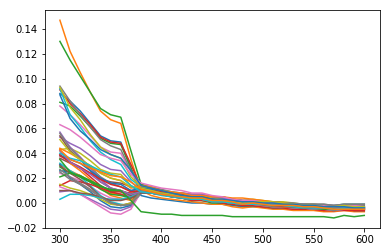

In [46]:
df_1c = r_to_c_order(df2)
df_1c_corrected = baseline_correction(df_1c.iloc[0:44], df_1c.iloc[44]) # remember index 0 = wavelengths, 1 = A1, 2 = B1 ... so 0:n sample + 2 
plot_wavelengths(df_1c_corrected)

In [45]:
df_1c[0:43]

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Wavelength,300.000,310.000,320.000,330.000,340.000,350.000,360.000,370.000,380.000,390.000,...,510.000,520.000,530.000,540.000,550.000,560.000,570.000,580.000,590.000,600.000
A1,0.743,0.530,0.443,0.377,0.318,0.286,0.257,0.169,0.087,0.070,...,0.047,0.047,0.047,0.047,0.047,0.046,0.046,0.046,0.046,0.046
B1,0.802,0.570,0.474,0.402,0.338,0.303,0.272,0.176,0.091,0.072,...,0.046,0.046,0.045,0.045,0.045,0.044,0.044,0.044,0.043,0.043
C1,0.736,0.526,0.439,0.374,0.316,0.284,0.255,0.169,0.091,0.074,...,0.049,0.049,0.049,0.048,0.048,0.048,0.048,0.047,0.047,0.047
D1,0.746,0.528,0.441,0.376,0.317,0.285,0.256,0.172,0.094,0.076,...,0.047,0.047,0.046,0.046,0.046,0.045,0.045,0.045,0.044,0.044
E1,0.708,0.496,0.413,0.351,0.295,0.263,0.234,0.158,0.091,0.075,...,0.050,0.049,0.048,0.047,0.047,0.046,0.045,0.045,0.044,0.044
F1,0.691,0.480,0.397,0.337,0.283,0.253,0.224,0.154,0.091,0.075,...,0.047,0.047,0.047,0.046,0.046,0.046,0.045,0.045,0.045,0.045
A2,0.733,0.519,0.432,0.367,0.309,0.277,0.248,0.166,0.094,0.077,...,0.049,0.049,0.048,0.048,0.047,0.046,0.046,0.046,0.045,0.045
B2,0.749,0.530,0.440,0.374,0.315,0.282,0.251,0.167,0.096,0.079,...,0.051,0.051,0.050,0.050,0.050,0.049,0.049,0.048,0.048,0.048
C2,0.698,0.492,0.409,0.347,0.291,0.260,0.231,0.155,0.091,0.076,...,0.052,0.052,0.051,0.050,0.050,0.049,0.048,0.047,0.047,0.046


In [33]:
s1 = df_1c.iloc[1]
blank = df_1c.iloc[43]
s1_b = s1.subtract(blank)
print(s1[1], blank[1], s1_b[1])

0.53 0.473 0.05700000000000005
